# Regression Visualization

<!--
Author: Molla Samser
Website: https://rskworld.in/
Email: help@rskworld.in
Phone: +91 93305 39277
Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147
-->

This notebook demonstrates regression visualization with Seaborn:
- Linear regression plots
- Polynomial regression
- Residual plots
- Regression with confidence intervals


In [1]:
# Author: Molla Samser
# Website: https://rskworld.in/
# Email: help@rskworld.in
# Phone: +91 93305 39277
# Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('../data/sample_data.csv')
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (30, 9)


,age,income,education_years,experience,gender,category,score,sales,region
0,25,45000,12,2,Male,Category A,75,1200,North
1,30,55000,14,5,Female,Category B,82,1500,South
2,35,65000,16,8,Male,Category A,88,1800,East
3,28,48000,13,3,Female,Category C,70,1100,West
4,32,60000,15,6,Male,Category B,85,1700,North


## 1. Basic Regression Plot (regplot)


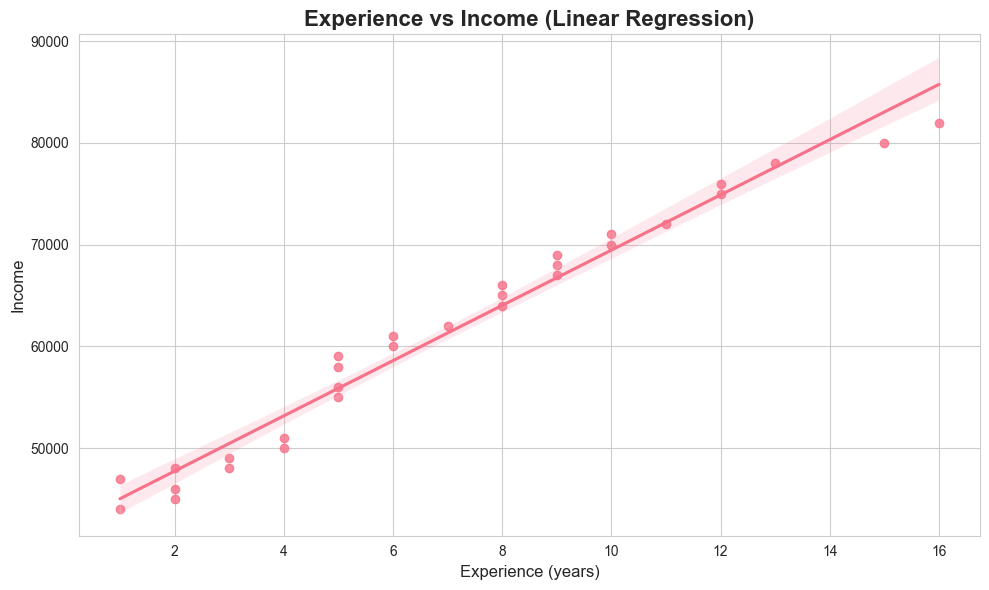

In [2]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Basic regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='experience', y='income', scatter=True, ci=95)
plt.title('Experience vs Income (Linear Regression)', fontsize=16, fontweight='bold')
plt.xlabel('Experience (years)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.tight_layout()
plt.savefig('../images/regplot_basic.png', dpi=300, bbox_inches='tight')
plt.show()


## 2. Regression Plot with Hue


<Figure size 1200x600 with 0 Axes>

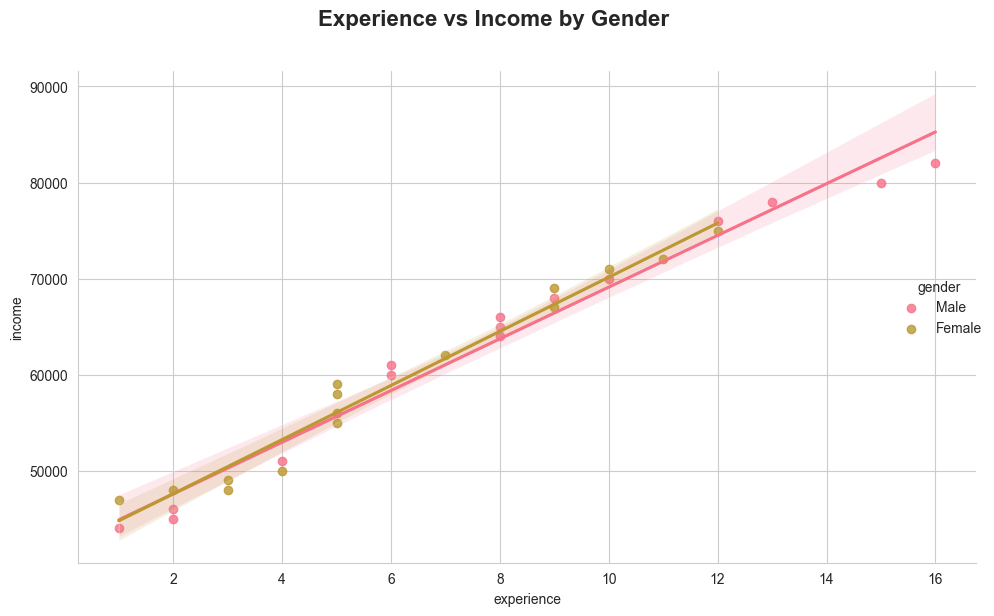

In [3]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Regression plot with hue
plt.figure(figsize=(12, 6))
sns.lmplot(data=df, x='experience', y='income', hue='gender', 
           scatter=True, ci=95, height=6, aspect=1.5)
plt.suptitle('Experience vs Income by Gender', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/regplot_hue.png', dpi=300, bbox_inches='tight')
plt.show()


## 3. Polynomial Regression


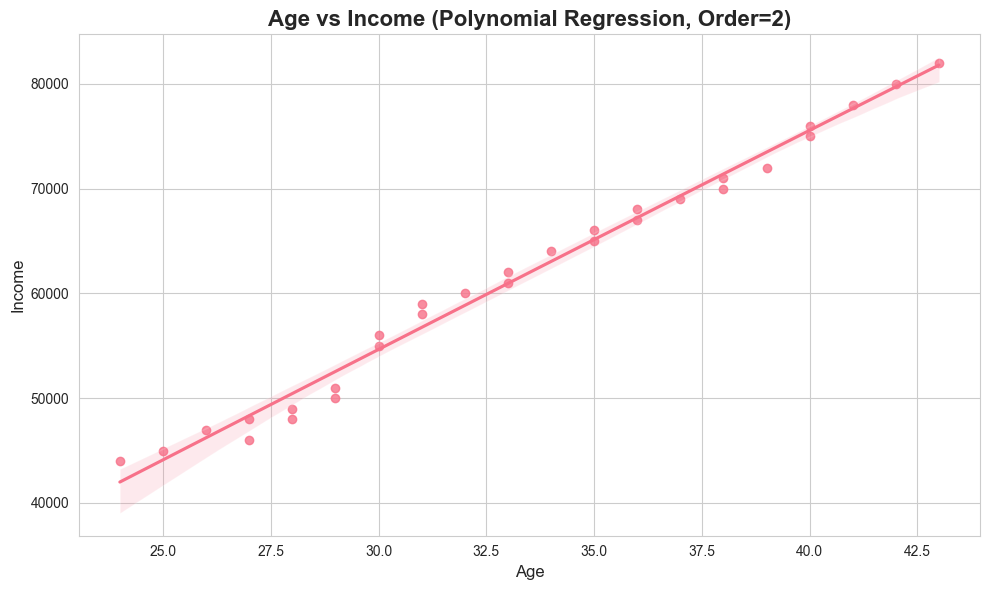

In [4]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Polynomial regression (order 2)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='income', order=2, scatter=True, ci=95)
plt.title('Age vs Income (Polynomial Regression, Order=2)', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.tight_layout()
plt.savefig('../images/regplot_polynomial.png', dpi=300, bbox_inches='tight')
plt.show()


## 4. Robust Regression


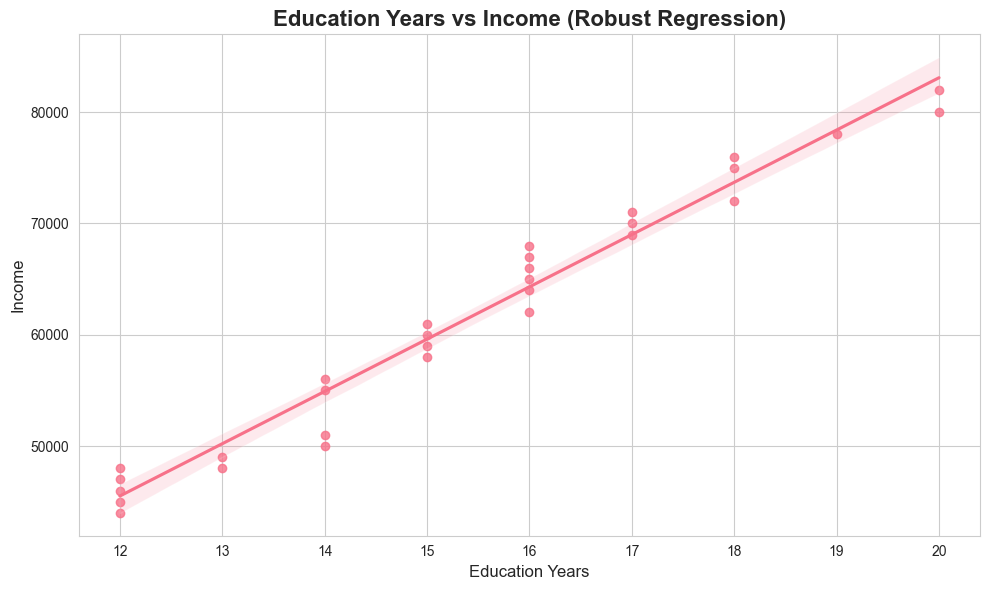

In [5]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Robust regression (less sensitive to outliers)
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='education_years', y='income', robust=True, scatter=True, ci=95)
plt.title('Education Years vs Income (Robust Regression)', fontsize=16, fontweight='bold')
plt.xlabel('Education Years', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.tight_layout()
plt.savefig('../images/regplot_robust.png', dpi=300, bbox_inches='tight')
plt.show()


## 5. Residual Plot


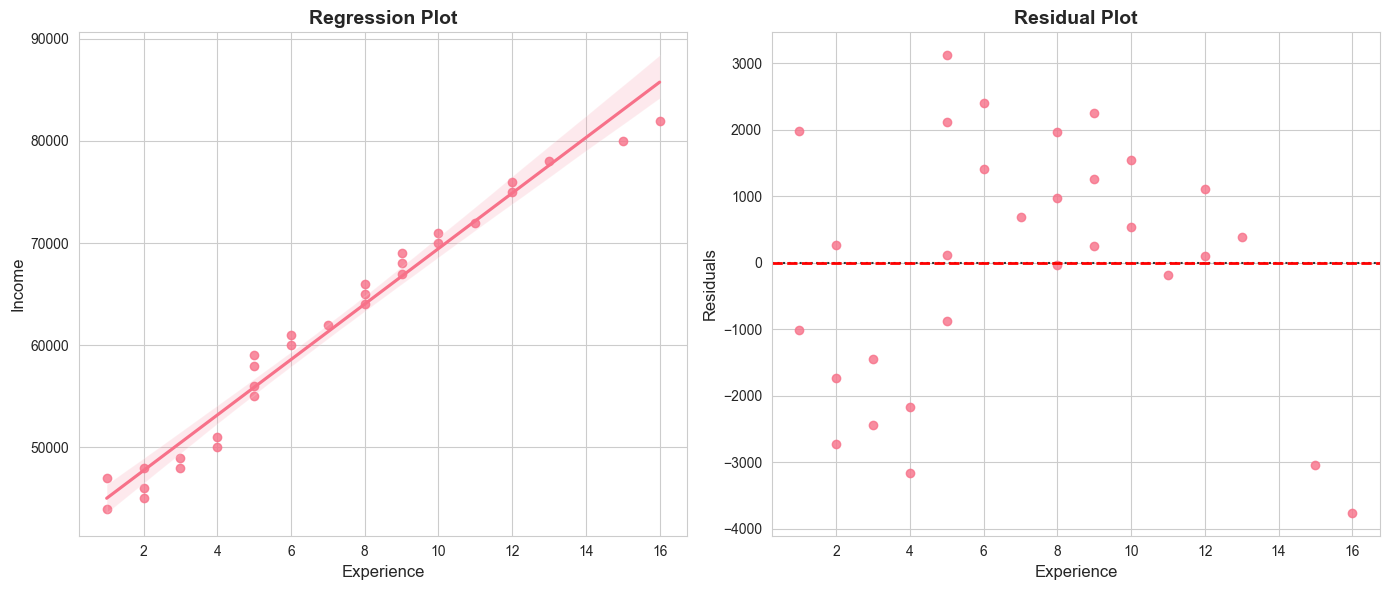

In [6]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Residual plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Regression plot
sns.regplot(data=df, x='experience', y='income', ax=axes[0], scatter=True, ci=95)
axes[0].set_title('Regression Plot', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Experience', fontsize=12)
axes[0].set_ylabel('Income', fontsize=12)

# Residual plot
sns.residplot(data=df, x='experience', y='income', ax=axes[1])
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Experience', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.tight_layout()
plt.savefig('../images/residual_plot.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Multiple Regression Facets


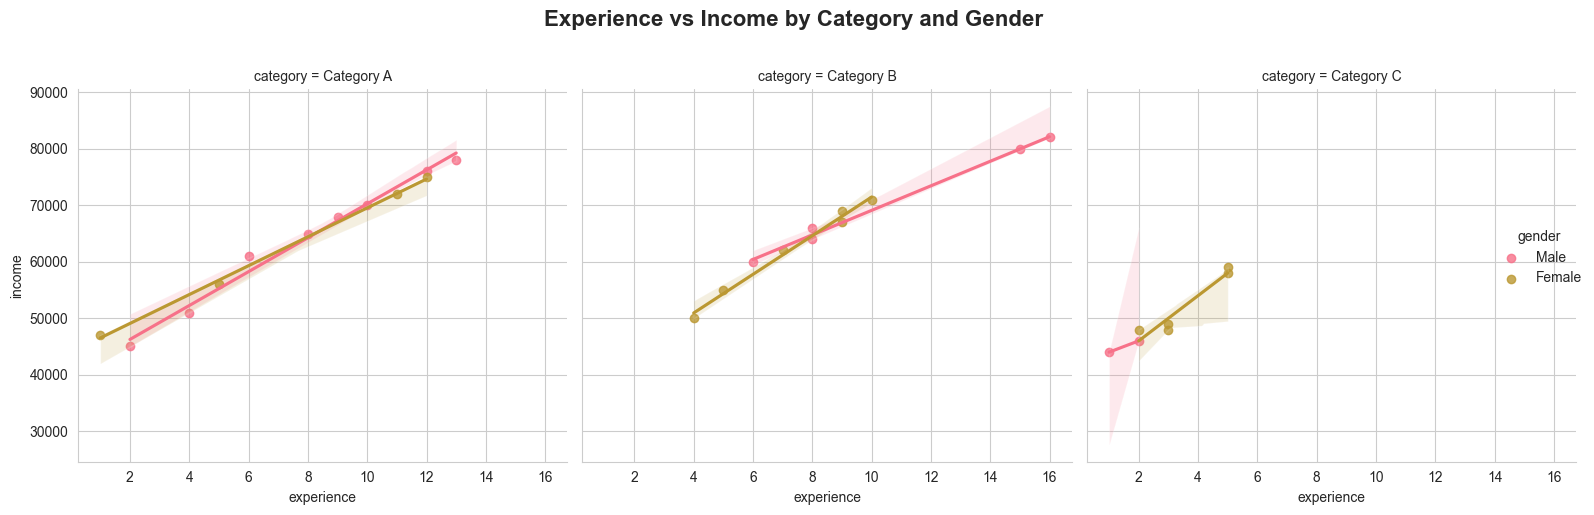

In [7]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Multiple regression plots by category
g = sns.lmplot(data=df, x='experience', y='income', col='category', 
               hue='gender', scatter=True, ci=95, height=5, aspect=1)
g.fig.suptitle('Experience vs Income by Category and Gender', 
               fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/regplot_facets.png', dpi=300, bbox_inches='tight')
plt.show()


## 7. Log Scale Regression


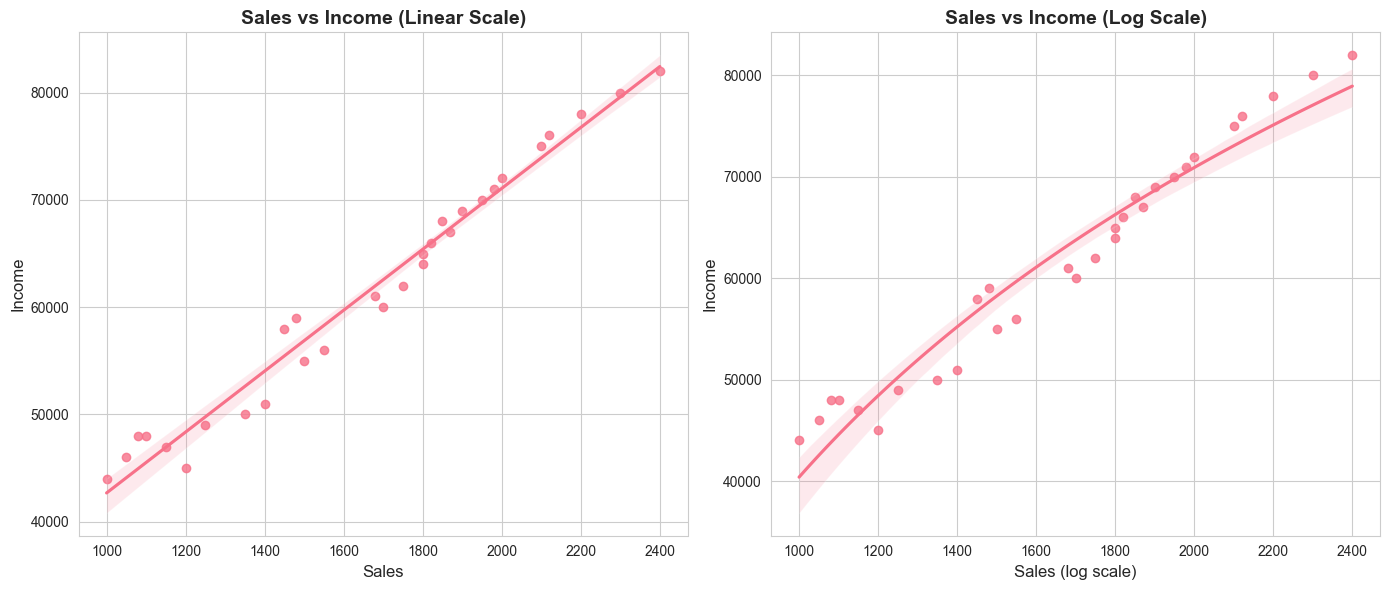

In [8]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Regression with log scale
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear scale
sns.regplot(data=df, x='sales', y='income', ax=axes[0], scatter=True, ci=95)
axes[0].set_title('Sales vs Income (Linear Scale)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales', fontsize=12)
axes[0].set_ylabel('Income', fontsize=12)

# Log scale
sns.regplot(data=df, x='sales', y='income', logx=True, ax=axes[1], scatter=True, ci=95)
axes[1].set_title('Sales vs Income (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sales (log scale)', fontsize=12)
axes[1].set_ylabel('Income', fontsize=12)

plt.tight_layout()
plt.savefig('../images/regplot_logscale.png', dpi=300, bbox_inches='tight')
plt.show()
